In [1]:
import pandas as pd

In [4]:
#read CSV file directly from the url and save the result
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = 0)

#display the first five rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
#display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [8]:
data.shape

(200, 4)

In [9]:
import seaborn as sns

In [10]:
%matplotlib inline

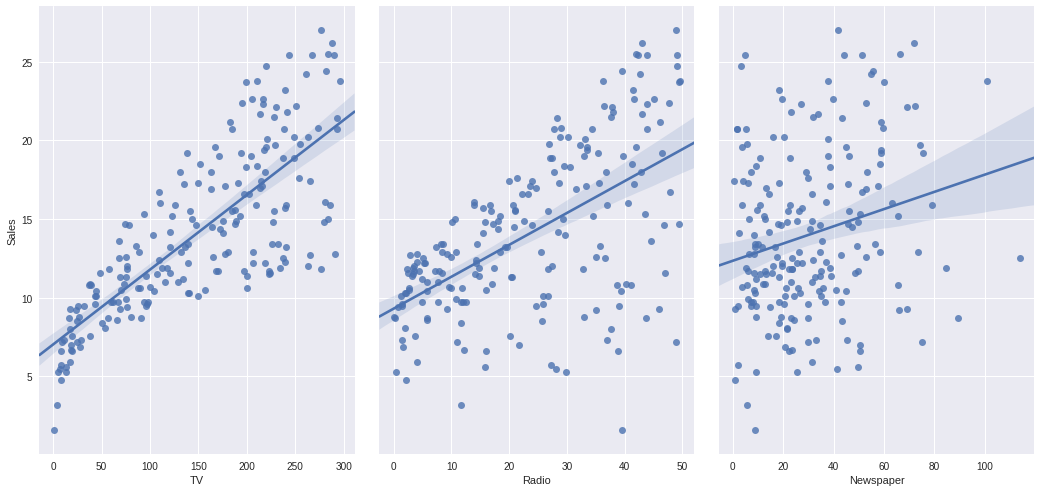

In [14]:
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind = 'reg')

In [23]:
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [24]:
print type(X)
X.shape

<class 'pandas.core.frame.DataFrame'>


(200, 3)

In [25]:
y = data['Sales']
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [26]:
print type(y)
y.shape

<class 'pandas.core.series.Series'>


(200,)

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)
#default split is 0.25 for tetsing, 0.75 for training

In [29]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150,)
(50,)


In [30]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [31]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print lreg.intercept_
print lreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [36]:
feature_cols = ['TV', 'Radio', 'Newspaper']
zip(feature_cols, lreg.coef_)

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111803779)]

In [37]:
y_pred = lreg.predict(X_test)

In [40]:
from sklearn import metrics

#sample evaluation using Mean Absolute Error (MAE)
true = [100, 90, 30, 50]
pred = [90, 90, 50, 40]

mae = (10 + 0 + 20 + 10)/4
print "MAE by hand %d" % mae
print metrics.mean_absolute_error(true, pred)

MAE by hand 10
10.0


In [42]:
import numpy as np
mse =  (10**2 + 0**2 + 20**2 + 10**2)/4
print "MSE by hand %d" % mse
print metrics.mean_squared_error(true, pred)

MSE by hand 150
150.0


In [44]:
rmse = np.sqrt(mse)
print "RMSE by hand: %f" % rmse
print np.sqrt(metrics.mean_squared_error(true, pred))

RMSE by hand: 12.247449
12.2474487139


In [45]:
print np.sqrt(metrics.mean_squared_error(y_pred, y_test))

1.40465142303


In [47]:
X = data[['TV', "Radio"]]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print np.sqrt(metrics.mean_squared_error(y_pred, y_test))

1.38790346994
